In [15]:
import pandas as pd
import numpy as np
from typing import Optional

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data 
train_peptides = pd.read_csv("train_peptides.csv")
train_proteins = pd.read_csv("train_proteins.csv")
train_clinincal_data = pd.read_csv("train_clinical_data.csv")
supplemental_clinical_data = pd.read_csv("supplemental_clinical_data.csv")

test_peptides = pd.read_csv("./example_test_files/test_peptides.csv")
test_proteins = pd.read_csv("./example_test_files/test_proteins.csv")
test = pd.read_csv("./example_test_files/test.csv")
submission_df = pd.read_csv("./example_test_files/sample_submission.csv")

In [29]:
# number of peptides in train set and test set
train_peptides['Peptide'].nunique(), test_peptides['Peptide'].nunique()

(968, 1077)

In [44]:
# number of interesected peptides
intersected_peptides = list(set(test_peptides['Peptide'].unique()).intersection(train_peptides['Peptide'].unique()))
len(intersected_peptides)

943

In [31]:
# number of peptides that don't appear in test set
len(set(train_peptides['Peptide'].unique()).difference(test_peptides['Peptide'].unique()))

25

In [32]:
# number of peptides that don't appear in train set
len(set(test_peptides['Peptide'].unique()).difference(train_peptides['Peptide'].unique()))

134

In [33]:
# Merge the proteins data and peptides data on the common columns.
merged_proteins_peptides = pd.merge(train_proteins, train_peptides, on=['visit_id', 'visit_month',
                                                                         'patient_id', 'UniProt'])

# Merge the merged protein-peptides data with the clinical data on the common columns.
merged = pd.merge(merged_proteins_peptides, train_clinincal_data, on=['visit_id', 'visit_month', 'patient_id'])

# Show the merged data.
merged

,visit_id,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.30,10.0,6.0,15.0,NaN,NaN
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.00,10.0,6.0,15.0,NaN,NaN
2,55_0,0,55,O00533,732430.0,IEIPSSVQQVPTIIK,174185.00,10.0,6.0,15.0,NaN,NaN
3,55_0,0,55,O00533,732430.0,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90,10.0,6.0,15.0,NaN,NaN
4,55_0,0,55,O00533,732430.0,SMEQNGPGLEYR,30838.70,10.0,6.0,15.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
941739,58648_108,108,58648,Q9UHG2,369437.0,ILAGSADSEGVAAPR,202820.00,6.0,0.0,0.0,NaN,NaN
941740,58648_108,108,58648,Q9UKV8,105830.0,SGNIPAGTTVDTK,105830.00,6.0,0.0,0.0,NaN,NaN
941741,58648_108,108,58648,Q9Y646,21257.6,LALLVDTVGPR,21257.60,6.0,0.0,0.0,NaN,NaN
941742,58648_108,108,58648,Q9Y6R7,17953.1,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26,6.0,0.0,0.0,NaN,NaN


In [34]:
merged.isna().sum()

visit_id                                    0
visit_month                                 0
patient_id                                  0
UniProt                                     0
NPX                                         0
Peptide                                     0
PeptideAbundance                            0
updrs_1                                     0
updrs_2                                     0
updrs_3                                  9120
updrs_4                                446214
upd23b_clinical_state_on_medication    550019
dtype: int64

In [35]:
# Pivot the data.
pivoted = merged.pivot(index='visit_id', columns=['Peptide'], values='PeptideAbundance')

# See the pivoted data.
pivoted

Peptide,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,ADDKETC(UniMod_4)FAEEGK,ADDKETC(UniMod_4)FAEEGKK,ADDLGKGGNEESTKTGNAGSR,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,6580710.0,31204.4,7735070.0,NaN,NaN,NaN,46620.3,236144.0,NaN,NaN,...,202274.0,NaN,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,NaN,7207.30
10053_12,6333510.0,52277.6,5394390.0,NaN,NaN,NaN,57554.5,108298.0,45885.4,NaN,...,201009.0,NaN,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,7129640.0,61522.0,7011920.0,35984.7,17188.00,19787.3,36029.4,708729.0,5067790.0,30838.2,...,220728.0,NaN,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,7404780.0,46107.2,10610900.0,NaN,20910.20,66662.3,55253.9,79575.5,6201210.0,26720.0,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,13788300.0,56910.3,6906160.0,13785.5,11004.20,63672.7,36819.8,34160.9,2117430.0,15645.2,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,NaN,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,6312970.0,44462.7,12455000.0,11051.3,1163.18,43279.8,67743.5,325328.0,4666550.0,11038.5,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,11289900.0,46111.7,11297300.0,NaN,13894.10,53755.0,40289.3,565112.0,NaN,26495.8,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,NaN
942_24,10161900.0,32145.0,12388000.0,25869.2,17341.80,48625.5,45223.9,84448.0,4684800.0,23150.2,...,185428.0,5554.53,NaN,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60


In [36]:
# Add visit_month, the 4 scores, and medication status.
df = pd.merge(train_clinincal_data, pivoted, on='visit_id', how='right').set_index('visit_id')
df

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,10053,0,3.0,0.0,13.0,0.0,NaN,6580710.0,31204.4,7735070.0,...,202274.0,NaN,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,NaN,7207.30
10053_12,10053,12,4.0,2.0,8.0,0.0,NaN,6333510.0,52277.6,5394390.0,...,201009.0,NaN,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,10053,18,2.0,2.0,0.0,0.0,NaN,7129640.0,61522.0,7011920.0,...,220728.0,NaN,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,10138,12,3.0,6.0,31.0,0.0,On,7404780.0,46107.2,10610900.0,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,10138,24,4.0,7.0,19.0,10.0,On,13788300.0,56910.3,6906160.0,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,NaN,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,8699,24,11.0,10.0,13.0,2.0,On,6312970.0,44462.7,12455000.0,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,942,12,5.0,2.0,25.0,0.0,NaN,11289900.0,46111.7,11297300.0,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,NaN
942_24,942,24,2.0,3.0,23.0,NaN,NaN,10161900.0,32145.0,12388000.0,...,185428.0,5554.53,NaN,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60


In [37]:
# Insert the visit_month column to the desired position.
df.insert(6, 'visit_month', df.pop('visit_month'))
df

,patient_id,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,visit_month,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,10053,3.0,0.0,13.0,0.0,NaN,0,6580710.0,31204.4,7735070.0,...,202274.0,NaN,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,NaN,7207.30
10053_12,10053,4.0,2.0,8.0,0.0,NaN,12,6333510.0,52277.6,5394390.0,...,201009.0,NaN,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,10053,2.0,2.0,0.0,0.0,NaN,18,7129640.0,61522.0,7011920.0,...,220728.0,NaN,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,10138,3.0,6.0,31.0,0.0,On,12,7404780.0,46107.2,10610900.0,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,10138,4.0,7.0,19.0,10.0,On,24,13788300.0,56910.3,6906160.0,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,NaN,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,8699,11.0,10.0,13.0,2.0,On,24,6312970.0,44462.7,12455000.0,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,942,5.0,2.0,25.0,0.0,NaN,12,11289900.0,46111.7,11297300.0,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,NaN
942_24,942,2.0,3.0,23.0,NaN,NaN,24,10161900.0,32145.0,12388000.0,...,185428.0,5554.53,NaN,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60


In [38]:
df = df.drop('patient_id', axis = 1)
df

,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,visit_month,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,3.0,0.0,13.0,0.0,NaN,0,6580710.0,31204.4,7735070.0,NaN,...,202274.0,NaN,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,NaN,7207.30
10053_12,4.0,2.0,8.0,0.0,NaN,12,6333510.0,52277.6,5394390.0,NaN,...,201009.0,NaN,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,2.0,2.0,0.0,0.0,NaN,18,7129640.0,61522.0,7011920.0,35984.7,...,220728.0,NaN,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,3.0,6.0,31.0,0.0,On,12,7404780.0,46107.2,10610900.0,NaN,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,4.0,7.0,19.0,10.0,On,24,13788300.0,56910.3,6906160.0,13785.5,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,NaN,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,11.0,10.0,13.0,2.0,On,24,6312970.0,44462.7,12455000.0,11051.3,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,5.0,2.0,25.0,0.0,NaN,12,11289900.0,46111.7,11297300.0,NaN,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,NaN
942_24,2.0,3.0,23.0,NaN,NaN,24,10161900.0,32145.0,12388000.0,25869.2,...,185428.0,5554.53,NaN,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60


In [52]:
# just getting the reduced dataframe with interesected peptides
reduced_df = df[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4',
       'upd23b_clinical_state_on_medication', 'visit_month'] + intersected_peptides]

reduced_df

,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,visit_month,SSNTYTLTDVRR,LSINTHPSQKPLSITVR,TNFDNDIALVR,TKKQELSEAEQATR,...,TLEAQLTPR,LDIDSPPITAR,DFADIPNLR,SGINC(UniMod_4)PIQK,FNKNNEGTYYSPNYNPQSR,NILDRQDPPSVVVTSHQAPGEK,ALMSPAGMLR,MYLGYEYVTAIR,SLGSPSGEVSHPR,NFPPSQDASGDLYTTSSQLTLPATQC(UniMod_4)LAGK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,3.0,0.0,13.0,0.0,NaN,0,NaN,323331.0,59948.0,30741.1,...,68400.4,NaN,119742.0,NaN,107954.0,51475.60,27653.7,393058.0,47510.8,66056.10
10053_12,4.0,2.0,8.0,0.0,NaN,12,NaN,495344.0,79517.2,NaN,...,82498.8,NaN,80273.7,NaN,137556.0,73044.60,33180.9,1823380.0,70286.1,31547.60
10053_18,2.0,2.0,0.0,0.0,NaN,18,NaN,431585.0,87819.4,170214.0,...,70308.5,NaN,92871.0,93738.3,131897.0,54881.00,42782.1,2904670.0,70395.8,18709.00
10138_12,3.0,6.0,31.0,0.0,On,12,NaN,383097.0,65732.0,NaN,...,92266.5,21867.4,133327.0,NaN,134920.0,64750.40,39383.0,3042050.0,82841.1,222024.00
10138_24,4.0,7.0,19.0,10.0,On,24,NaN,701519.0,86270.5,101970.0,...,66311.1,29174.6,159582.0,NaN,120811.0,27149.70,40951.0,2508030.0,85578.6,149822.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,11.0,10.0,13.0,2.0,On,24,6327.89,664349.0,47980.4,109771.0,...,81630.8,12470.4,57315.9,58137.0,125974.0,107583.00,22222.2,6197780.0,103125.0,139656.00
942_12,5.0,2.0,25.0,0.0,NaN,12,8128.11,320858.0,57747.0,NaN,...,79351.4,NaN,99881.1,73197.2,122237.0,NaN,20170.3,2457590.0,59025.6,10262.70
942_24,2.0,3.0,23.0,NaN,NaN,24,NaN,592485.0,50427.5,130148.0,...,79460.3,12128.7,78533.4,61812.9,154073.0,9883.75,20366.4,2734010.0,56894.5,9137.12


In [59]:
# Replace NaN with 0 in the Peptides columns.
reduced_df.iloc[:, 6:] = reduced_df.iloc[:, 6:].fillna(0)


c:\Users\user\anaconda3\envs\desaisiv\lib\site-packages\pandas\core\indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [62]:
# dropping state on medication
reduced_df.drop("upd23b_clinical_state_on_medication", axis=1, inplace=True)

c:\Users\user\anaconda3\envs\desaisiv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [63]:
reduced_df.isna().sum()

updrs_1                                       0
updrs_2                                       0
updrs_3                                      10
updrs_4                                     499
visit_month                                   0
                                           ... 
NILDRQDPPSVVVTSHQAPGEK                        0
ALMSPAGMLR                                    0
MYLGYEYVTAIR                                  0
SLGSPSGEVSHPR                                 0
NFPPSQDASGDLYTTSSQLTLPATQC(UniMod_4)LAGK      0
Length: 948, dtype: int64

In [64]:
def replace_missing_values(df: pd.DataFrame, method: Optional[str] = 'mean') -> pd.DataFrame:
    """
    Given a Pandas DataFrame, replaces missing values with either 0, removes them, 
    or replaces them with the mean of the respective column.
    
    Parameters:
    df (pd.DataFrame): Input dataframe to replace missing values.
    method (str, optional): The method to use for replacing missing values. 
        Valid options are 'mean', 'zero' and 'remove'. Defaults to 'mean'.
    
    Returns:
    pd.DataFrame: A DataFrame with the missing values replaced according to the selected method.
    """
    
    # Replace missing values with 0
    if method == "zero":
        df = df.fillna(0)+1e-7
        return df
    
    # Remove rows with missing values
    elif method == "remove":
        df = df.dropna()
        return df
    
    # Replace missing values with the mean of the respective column
    elif method == "mean":
        for col in df.select_dtypes(include=['number']).columns:
            df[col] = df[col].fillna(df[col].mean())
        return df
    
    # Invalid method
    else:
        print("Invalid method. Valid options are 'mean', 'zero' and 'remove'.")
        return None

In [65]:
clean_df = replace_missing_values(reduced_df, "mean")

c:\Users\user\anaconda3\envs\desaisiv\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [66]:
clean_df

,updrs_1,updrs_2,updrs_3,updrs_4,visit_month,SSNTYTLTDVRR,LSINTHPSQKPLSITVR,TNFDNDIALVR,TKKQELSEAEQATR,EYC(UniMod_4)GVPGDGDEELLR,...,TLEAQLTPR,LDIDSPPITAR,DFADIPNLR,SGINC(UniMod_4)PIQK,FNKNNEGTYYSPNYNPQSR,NILDRQDPPSVVVTSHQAPGEK,ALMSPAGMLR,MYLGYEYVTAIR,SLGSPSGEVSHPR,NFPPSQDASGDLYTTSSQLTLPATQC(UniMod_4)LAGK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,3.0,0.0,13.0,0.000000,0,0.00,323331.0,59948.0,30741.1,100126.0,...,68400.4,0.0,119742.0,0.0,107954.0,51475.60,27653.7,393058.0,47510.8,66056.10
10053_12,4.0,2.0,8.0,0.000000,12,0.00,495344.0,79517.2,0.0,95360.4,...,82498.8,0.0,80273.7,0.0,137556.0,73044.60,33180.9,1823380.0,70286.1,31547.60
10053_18,2.0,2.0,0.0,0.000000,18,0.00,431585.0,87819.4,170214.0,99196.1,...,70308.5,0.0,92871.0,93738.3,131897.0,54881.00,42782.1,2904670.0,70395.8,18709.00
10138_12,3.0,6.0,31.0,0.000000,12,0.00,383097.0,65732.0,0.0,125571.0,...,92266.5,21867.4,133327.0,0.0,134920.0,64750.40,39383.0,3042050.0,82841.1,222024.00
10138_24,4.0,7.0,19.0,10.000000,24,0.00,701519.0,86270.5,101970.0,131592.0,...,66311.1,29174.6,159582.0,0.0,120811.0,27149.70,40951.0,2508030.0,85578.6,149822.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,11.0,10.0,13.0,2.000000,24,6327.89,664349.0,47980.4,109771.0,176905.0,...,81630.8,12470.4,57315.9,58137.0,125974.0,107583.00,22222.2,6197780.0,103125.0,139656.00
942_12,5.0,2.0,25.0,0.000000,12,8128.11,320858.0,57747.0,0.0,99562.7,...,79351.4,0.0,99881.1,73197.2,122237.0,0.00,20170.3,2457590.0,59025.6,10262.70
942_24,2.0,3.0,23.0,1.908612,24,0.00,592485.0,50427.5,130148.0,93483.3,...,79460.3,12128.7,78533.4,61812.9,154073.0,9883.75,20366.4,2734010.0,56894.5,9137.12


In [67]:
clean_df.isna().sum().sum()

0

In [68]:
targets_cols = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']
X = clean_df.drop(targets_cols, axis=1)
X.to_csv("X.csv", index=False)

for target in targets_cols:
    y = clean_df[target]
    y.to_csv("{}.csv".format(target), index=False)

In [16]:
# Merge the proteins data and peptides data on the common columns.
test_merged_proteins_peptides = pd.merge(test_proteins, test_peptides, on=['visit_id', 'visit_month', 'patient_id', 'UniProt'])

# Merge the merged protein-peptides data with the clinical data on the common columns.
test_merged = pd.merge(test_merged_proteins_peptides, test, on=['visit_id', 'visit_month', 'patient_id'])

# Show the merged data.
test_merged

,visit_id,visit_month,patient_id,UniProt,NPX,group_key_x,Peptide,PeptideAbundance,group_key_y,updrs_test,row_id,group_key
0,50423_0,0,50423,O00391,33127.9,0,AHFSPSNIILDFPAAGSAAR,22226.30,0,updrs_1,50423_0_updrs_1,0
1,50423_0,0,50423,O00391,33127.9,0,AHFSPSNIILDFPAAGSAAR,22226.30,0,updrs_2,50423_0_updrs_2,0
2,50423_0,0,50423,O00391,33127.9,0,AHFSPSNIILDFPAAGSAAR,22226.30,0,updrs_3,50423_0_updrs_3,0
3,50423_0,0,50423,O00391,33127.9,0,AHFSPSNIILDFPAAGSAAR,22226.30,0,updrs_4,50423_0_updrs_4,0
4,50423_0,0,50423,O00391,33127.9,0,NEQEQPLGQWHLS,10901.60,0,updrs_1,50423_0_updrs_1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8223,3342_6,6,3342,Q9Y6R7,14624.5,6,AGC(UniMod_4)VAESTAVC(UniMod_4)R,4253.17,6,updrs_4,3342_6_updrs_4,6
8224,3342_6,6,3342,Q9Y6R7,14624.5,6,GATTSPGVYELSSR,10371.30,6,updrs_1,3342_6_updrs_1,6
8225,3342_6,6,3342,Q9Y6R7,14624.5,6,GATTSPGVYELSSR,10371.30,6,updrs_2,3342_6_updrs_2,6
8226,3342_6,6,3342,Q9Y6R7,14624.5,6,GATTSPGVYELSSR,10371.30,6,updrs_3,3342_6_updrs_3,6


In [17]:
test_merged['prediction_id'] = test_merged.apply(lambda x: '{}_plus_{}months'.format(x['row_id'], x['visit_month']), axis=1)
test_merged

,visit_id,visit_month,patient_id,UniProt,NPX,group_key_x,Peptide,PeptideAbundance,group_key_y,updrs_test,row_id,group_key,prediction_id
0,50423_0,0,50423,O00391,33127.9,0,AHFSPSNIILDFPAAGSAAR,22226.30,0,updrs_1,50423_0_updrs_1,0,50423_0_updrs_1_plus_0months
1,50423_0,0,50423,O00391,33127.9,0,AHFSPSNIILDFPAAGSAAR,22226.30,0,updrs_2,50423_0_updrs_2,0,50423_0_updrs_2_plus_0months
2,50423_0,0,50423,O00391,33127.9,0,AHFSPSNIILDFPAAGSAAR,22226.30,0,updrs_3,50423_0_updrs_3,0,50423_0_updrs_3_plus_0months
3,50423_0,0,50423,O00391,33127.9,0,AHFSPSNIILDFPAAGSAAR,22226.30,0,updrs_4,50423_0_updrs_4,0,50423_0_updrs_4_plus_0months
4,50423_0,0,50423,O00391,33127.9,0,NEQEQPLGQWHLS,10901.60,0,updrs_1,50423_0_updrs_1,0,50423_0_updrs_1_plus_0months
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8223,3342_6,6,3342,Q9Y6R7,14624.5,6,AGC(UniMod_4)VAESTAVC(UniMod_4)R,4253.17,6,updrs_4,3342_6_updrs_4,6,3342_6_updrs_4_plus_6months
8224,3342_6,6,3342,Q9Y6R7,14624.5,6,GATTSPGVYELSSR,10371.30,6,updrs_1,3342_6_updrs_1,6,3342_6_updrs_1_plus_6months
8225,3342_6,6,3342,Q9Y6R7,14624.5,6,GATTSPGVYELSSR,10371.30,6,updrs_2,3342_6_updrs_2,6,3342_6_updrs_2_plus_6months
8226,3342_6,6,3342,Q9Y6R7,14624.5,6,GATTSPGVYELSSR,10371.30,6,updrs_3,3342_6_updrs_3,6,3342_6_updrs_3_plus_6months


In [18]:
# Pivot the data
test_pivoted = test_merged.pivot(index='prediction_id', columns=['Peptide'], values='PeptideAbundance')

# See the pivoted data
test_pivoted

Peptide,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,AAVYHHFISDGVRK,AC(UniMod_4)DGINDC(UniMod_4)GDQSDELC(UniMod_4)C(UniMod_4)K,AC(UniMod_4)EPGVDYVYK,...,YSSDYFQAPSDYR,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
prediction_id,,,,,,,,,,,,,,,,,,,,,
3342_6_updrs_1_plus_6months,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,58295.7,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
3342_6_updrs_2_plus_6months,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,58295.7,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
3342_6_updrs_3_plus_6months,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,58295.7,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
3342_6_updrs_4_plus_6months,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,58295.7,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
50423_0_updrs_1_plus_0months,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,75916.4,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23
50423_0_updrs_2_plus_0months,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,75916.4,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23
50423_0_updrs_3_plus_0months,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,75916.4,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23
50423_0_updrs_4_plus_0months,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,75916.4,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23


In [19]:
test_pivoted.isna().sum().sum()

388

In [20]:
# Replace NaN with 0 in the Peptides columns.
test_pivoted.loc[:, 'AADDTWEPFASGK':] = test_pivoted.loc[:, 'AADDTWEPFASGK':].fillna(0)
test_pivoted


Peptide,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,AAVYHHFISDGVRK,AC(UniMod_4)DGINDC(UniMod_4)GDQSDELC(UniMod_4)C(UniMod_4)K,AC(UniMod_4)EPGVDYVYK,...,YSSDYFQAPSDYR,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
prediction_id,,,,,,,,,,,,,,,,,,,,,
3342_6_updrs_1_plus_6months,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,58295.7,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
3342_6_updrs_2_plus_6months,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,58295.7,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
3342_6_updrs_3_plus_6months,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,58295.7,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
3342_6_updrs_4_plus_6months,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,58295.7,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
50423_0_updrs_1_plus_0months,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,75916.4,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23
50423_0_updrs_2_plus_0months,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,75916.4,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23
50423_0_updrs_3_plus_0months,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,75916.4,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23
50423_0_updrs_4_plus_0months,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,75916.4,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23


In [21]:
# cool no null values
test_pivoted.isna().sum().sum()

0

In [22]:
# We need to remove duplicates by patient_id.
index_list = list(test_pivoted.index)
patient_id = []
for i in range(len(test_pivoted)):
    element = index_list[i].split('_')[0]
    patient_id.append(element)
    
patient_id

['3342', '3342', '3342', '3342', '50423', '50423', '50423', '50423']

In [23]:
test_pivoted['patient_id'] = patient_id
test_pivoted

Peptide,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,AAVYHHFISDGVRK,AC(UniMod_4)DGINDC(UniMod_4)GDQSDELC(UniMod_4)C(UniMod_4)K,AC(UniMod_4)EPGVDYVYK,...,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK,patient_id
prediction_id,,,,,,,,,,,,,,,,,,,,,
3342_6_updrs_1_plus_6months,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,58295.7,...,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60,3342
3342_6_updrs_2_plus_6months,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,58295.7,...,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60,3342
3342_6_updrs_3_plus_6months,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,58295.7,...,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60,3342
3342_6_updrs_4_plus_6months,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,58295.7,...,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60,3342
50423_0_updrs_1_plus_0months,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,75916.4,...,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23,50423
50423_0_updrs_2_plus_0months,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,75916.4,...,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23,50423
50423_0_updrs_3_plus_0months,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,75916.4,...,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23,50423
50423_0_updrs_4_plus_0months,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,75916.4,...,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23,50423


In [24]:
test_pivoted = test_pivoted.drop_duplicates(subset = 'patient_id')
patient_id = test_pivoted.pop('patient_id')
test_pivoted.insert(0, 'patient_id', patient_id)
test_pivoted

Peptide,patient_id,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,AAVYHHFISDGVRK,AC(UniMod_4)DGINDC(UniMod_4)GDQSDELC(UniMod_4)C(UniMod_4)K,...,YSSDYFQAPSDYR,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
prediction_id,,,,,,,,,,,,,,,,,,,,,
3342_6_updrs_1_plus_6months,3342,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
50423_0_updrs_1_plus_0months,50423,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23


In [25]:
# We need to crate visit_month in sample submission.
index_list = list(submission_df.prediction_id)
patient_id = []
for i in range(len(submission_df)):
    element = index_list[i].split('_')[0]
    patient_id.append(element)
    
print(patient_id)

['3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423']


In [26]:
submission_df['patient_id'] = patient_id
submission_df

,prediction_id,rating,group_key,patient_id
0,3342_0_updrs_1_plus_0_months,0,0,3342
1,3342_0_updrs_1_plus_6_months,0,0,3342
2,3342_0_updrs_1_plus_12_months,0,0,3342
3,3342_0_updrs_1_plus_24_months,0,0,3342
4,3342_0_updrs_2_plus_0_months,0,0,3342
...,...,...,...,...
59,50423_6_updrs_3_plus_24_months,0,6,50423
60,50423_6_updrs_4_plus_0_months,0,6,50423
61,50423_6_updrs_4_plus_6_months,0,6,50423
62,50423_6_updrs_4_plus_12_months,0,6,50423


In [27]:
# We need to crate updrs in sample submission.
index_list = list(submission_df.prediction_id)
updrs = []
for i in range(len(submission_df)):
    element = index_list[i].split('_')[3]
    updrs.append(element)
    
print(updrs)

['1', '1', '1', '1', '2', '2', '2', '2', '3', '3', '3', '3', '4', '4', '4', '4', '1', '1', '1', '1', '2', '2', '2', '2', '3', '3', '3', '3', '4', '4', '4', '4', '1', '1', '1', '1', '2', '2', '2', '2', '3', '3', '3', '3', '4', '4', '4', '4', '1', '1', '1', '1', '2', '2', '2', '2', '3', '3', '3', '3', '4', '4', '4', '4']


In [28]:
submission_df['updrs'] = updrs
submission_df

,prediction_id,rating,group_key,patient_id,updrs
0,3342_0_updrs_1_plus_0_months,0,0,3342,1
1,3342_0_updrs_1_plus_6_months,0,0,3342,1
2,3342_0_updrs_1_plus_12_months,0,0,3342,1
3,3342_0_updrs_1_plus_24_months,0,0,3342,1
4,3342_0_updrs_2_plus_0_months,0,0,3342,2
...,...,...,...,...,...
59,50423_6_updrs_3_plus_24_months,0,6,50423,3
60,50423_6_updrs_4_plus_0_months,0,6,50423,4
61,50423_6_updrs_4_plus_6_months,0,6,50423,4
62,50423_6_updrs_4_plus_12_months,0,6,50423,4


In [29]:
# We need to crate patient_id in sample submission.
index_list = list(submission_df.prediction_id)
visit_month = []
for i in range(len(submission_df)):
    element = index_list[i].split('_')[-2]
    visit_month.append(element)
    
print(visit_month)

['0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24']


In [30]:
submission_df['visit_month'] = visit_month
submission_df

,prediction_id,rating,group_key,patient_id,updrs,visit_month
0,3342_0_updrs_1_plus_0_months,0,0,3342,1,0
1,3342_0_updrs_1_plus_6_months,0,0,3342,1,6
2,3342_0_updrs_1_plus_12_months,0,0,3342,1,12
3,3342_0_updrs_1_plus_24_months,0,0,3342,1,24
4,3342_0_updrs_2_plus_0_months,0,0,3342,2,0
...,...,...,...,...,...,...
59,50423_6_updrs_3_plus_24_months,0,6,50423,3,24
60,50423_6_updrs_4_plus_0_months,0,6,50423,4,0
61,50423_6_updrs_4_plus_6_months,0,6,50423,4,6
62,50423_6_updrs_4_plus_12_months,0,6,50423,4,12


In [31]:
# Merge the data and sample_submission, while keeping the order of rows of sample_submission.
test_df = pd.merge(submission_df, test_pivoted, on=['patient_id'], how='left')
test_df

,prediction_id,rating,group_key,patient_id,updrs,visit_month,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,...,YSSDYFQAPSDYR,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
0,3342_0_updrs_1_plus_0_months,0,0,3342,1,0,7579140.0,74133.6,7580720.0,45426.9,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
1,3342_0_updrs_1_plus_6_months,0,0,3342,1,6,7579140.0,74133.6,7580720.0,45426.9,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
2,3342_0_updrs_1_plus_12_months,0,0,3342,1,12,7579140.0,74133.6,7580720.0,45426.9,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
3,3342_0_updrs_1_plus_24_months,0,0,3342,1,24,7579140.0,74133.6,7580720.0,45426.9,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
4,3342_0_updrs_2_plus_0_months,0,0,3342,2,0,7579140.0,74133.6,7580720.0,45426.9,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,50423_6_updrs_3_plus_24_months,0,6,50423,3,24,11087200.0,53998.5,9937660.0,25876.8,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23
60,50423_6_updrs_4_plus_0_months,0,6,50423,4,0,11087200.0,53998.5,9937660.0,25876.8,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23
61,50423_6_updrs_4_plus_6_months,0,6,50423,4,6,11087200.0,53998.5,9937660.0,25876.8,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23
62,50423_6_updrs_4_plus_12_months,0,6,50423,4,12,11087200.0,53998.5,9937660.0,25876.8,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23


In [32]:
df = df.drop('upd23b_clinical_state_on_medication', axis = 1)
df

,updrs_1,updrs_2,updrs_3,updrs_4,visit_month,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,3.0,0.0,13.0,0.0,0,6580710.0,31204.4,7735070.0,0.0,0.00,...,202274.0,0.00,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,0.0,7207.30
10053_12,4.0,2.0,8.0,0.0,12,6333510.0,52277.6,5394390.0,0.0,0.00,...,201009.0,0.00,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,2.0,2.0,0.0,0.0,18,7129640.0,61522.0,7011920.0,35984.7,17188.00,...,220728.0,0.00,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,3.0,6.0,31.0,0.0,12,7404780.0,46107.2,10610900.0,0.0,20910.20,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,4.0,7.0,19.0,10.0,24,13788300.0,56910.3,6906160.0,13785.5,11004.20,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,0.0,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,11.0,10.0,13.0,2.0,24,6312970.0,44462.7,12455000.0,11051.3,1163.18,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,5.0,2.0,25.0,0.0,12,11289900.0,46111.7,11297300.0,0.0,13894.10,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,0.00
942_24,2.0,3.0,23.0,NaN,24,10161900.0,32145.0,12388000.0,25869.2,17341.80,...,185428.0,5554.53,0.0,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60


In [33]:
# If a peptide in the train dataset does not exist in the test dataset, remove it.
remove_train = []
for i in range(len(list(df.columns[5:].values))):
    if list(df.columns[5:].values)[i] not in list(test_df.columns[6:].values):
        remove_train.append(list(df.columns[5:].values)[i])
        
remove_train

['C(UniMod_4)C(UniMod_4)VEC(UniMod_4)PPC(UniMod_4)PAPPVAGPSVFLFPPKPK',
 'DALSSVQESQVAQQAR',
 'DC(UniMod_4)GSVDGVIKEVNVSPC(UniMod_4)PTQPC(UniMod_4)QLSK',
 'DRLDEVKEQVAEVR',
 'DSGVPDRFSGSGSGTDFTLK',
 'DYVSQFEGSALGK',
 'EKLQDEDLGFL',
 'EPQVYTLPPSRDELTK',
 'FSALEVDETYVPK',
 'GGTLGTPQTGSENDALYEYLR',
 'HGNVAEGETKPDPDVTER',
 'LAAC(UniMod_4)GPPPVAPPAAVAAVAGGAR',
 'LEPGQQEEYYR',
 'LYQQHGAGLFDVTR',
 'QALNTDYLDSDYQR',
 'QALPQVR',
 'QQLVETHMAR',
 'RYIETDPANRDR',
 'SLEDQVEMLR',
 'TINPAVDHC(UniMod_4)C(UniMod_4)K',
 'TPVSDRVTK',
 'TSPVDEKALQDQLVLVAAK',
 'VAHQLQALR',
 'VPEEDLKR',
 'VSEADIQR']

In [34]:
df = df.drop(remove_train, axis = 1)
df

,updrs_1,updrs_2,updrs_3,updrs_4,visit_month,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,3.0,0.0,13.0,0.0,0,6580710.0,31204.4,7735070.0,0.0,0.00,...,202274.0,0.00,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,0.0,7207.30
10053_12,4.0,2.0,8.0,0.0,12,6333510.0,52277.6,5394390.0,0.0,0.00,...,201009.0,0.00,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,2.0,2.0,0.0,0.0,18,7129640.0,61522.0,7011920.0,35984.7,17188.00,...,220728.0,0.00,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,3.0,6.0,31.0,0.0,12,7404780.0,46107.2,10610900.0,0.0,20910.20,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,4.0,7.0,19.0,10.0,24,13788300.0,56910.3,6906160.0,13785.5,11004.20,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,0.0,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,11.0,10.0,13.0,2.0,24,6312970.0,44462.7,12455000.0,11051.3,1163.18,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,5.0,2.0,25.0,0.0,12,11289900.0,46111.7,11297300.0,0.0,13894.10,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,0.00
942_24,2.0,3.0,23.0,NaN,24,10161900.0,32145.0,12388000.0,25869.2,17341.80,...,185428.0,5554.53,0.0,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60


In [35]:
# If a peptide in the test dataset does not exist in the train dataset, remove it.
remove_test = []
for i in range(len(list(test_df.columns[6:].values))):
    if list(test_df.columns[6:].values)[i] not in list(df.columns[5:].values):
        remove_test.append(list(test_df.columns[6:].values)[i])
        
remove_test

['AAVYHHFISDGVRK',
 'AC(UniMod_4)DGINDC(UniMod_4)GDQSDELC(UniMod_4)C(UniMod_4)K',
 'AC(UniMod_4)EPGVDYVYK',
 'AEAQAQYSAAVAK',
 'AHFSPSNIILDFPAAGSAAR',
 'AIINLAVYGK',
 'APLQGTLLGYR',
 'APSVPAAEPEYPK',
 'AVC(UniMod_4)VLKGDGPVQGIINFEQK',
 'C(UniMod_4)C(UniMod_4)TESLVNRRPC(UniMod_4)FSALEVDETYVPK',
 'C(UniMod_4)DEWSVNSVGKIEC(UniMod_4)VSAETTEDC(UniMod_4)IAK',
 'C(UniMod_4)FEPQLLR',
 'C(UniMod_4)VC(UniMod_4)PVSNAM(UniMod_35)C(UniMod_4)R',
 'DGSTIPIAK',
 'DIC(UniMod_4)EEQVNSLPGSITK',
 'DKATFGC(UniMod_4)HDGYSLDGPEEIEC(UniMod_4)TK',
 'DPNGLPPEAQK',
 'DRDGNTLTYYR',
 'DSAHGFLK',
 'DSTGTYTC(UniMod_4)VAR',
 'EDGGGWWYNR',
 'EFQLFSSPHGKDLLFK',
 'EGDALELTC(UniMod_4)EAIGKPQPVMVTWVR',
 'EGTC(UniMod_4)PEAPTDEC(UniMod_4)KPVKWC(UniMod_4)ALSHHER',
 'ETPAATEAPSSTPK',
 'EVPLNTIIFM(UniMod_35)GR',
 'EYLGAIC(UniMod_4)SC(UniMod_4)TC(UniMod_4)FGGQR',
 'FISLGEAC(UniMod_4)K',
 'FNAVLTNPQGDYDTSTGK',
 'FPVFMGR',
 'GDGPVQGIINFEQK',
 'GDSPASSKPISINYR',
 'GELDC(UniMod_4)HQLADSFRE',
 'GEQEHSQQKEEEEEMAVVPQGLFR',
 'GFNC(UniM

In [36]:
test_df = test_df.drop(remove_test, axis = 1)
test_df

,prediction_id,rating,group_key,patient_id,updrs,visit_month,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
0,3342_0_updrs_1_plus_0_months,0,0,3342,1,0,7579140.0,74133.6,7580720.0,45426.9,...,219474.0,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
1,3342_0_updrs_1_plus_6_months,0,0,3342,1,6,7579140.0,74133.6,7580720.0,45426.9,...,219474.0,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
2,3342_0_updrs_1_plus_12_months,0,0,3342,1,12,7579140.0,74133.6,7580720.0,45426.9,...,219474.0,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
3,3342_0_updrs_1_plus_24_months,0,0,3342,1,24,7579140.0,74133.6,7580720.0,45426.9,...,219474.0,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
4,3342_0_updrs_2_plus_0_months,0,0,3342,2,0,7579140.0,74133.6,7580720.0,45426.9,...,219474.0,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,50423_6_updrs_3_plus_24_months,0,6,50423,3,24,11087200.0,53998.5,9937660.0,25876.8,...,257227.0,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23
60,50423_6_updrs_4_plus_0_months,0,6,50423,4,0,11087200.0,53998.5,9937660.0,25876.8,...,257227.0,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23
61,50423_6_updrs_4_plus_6_months,0,6,50423,4,6,11087200.0,53998.5,9937660.0,25876.8,...,257227.0,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23
62,50423_6_updrs_4_plus_12_months,0,6,50423,4,12,11087200.0,53998.5,9937660.0,25876.8,...,257227.0,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23


In [37]:
from sklearn.feature_selection import SelectKBest, f_regression

# Separate the dataset for updrs_1.
df_updrs1 = df[['updrs_1'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs1 = df_updrs1.iloc[:, 1:]
y_updrs1 = df_updrs1.iloc[:, 0]

# Select the top 10 features based on the F-test score.
selector1 = SelectKBest(score_func = f_regression, k = 10)

# Fit the selector on the independent variables and target variable.
X_new1 = selector1.fit_transform(X_updrs1, y_updrs1)

# Get the indices of the selected features.
selected_indices1 = selector1.get_support(indices = True)

# Get the names of the selected features.
selected_X_updrs1 = X_updrs1.columns[selected_indices1]

In [40]:
# the selected features
X_new1

array([[    0.  , 60980.2 ,     0.  , ...,     0.  ,     0.  ,     0.  ],
       [    0.  , 52614.2 ,     0.  , ...,     0.  ,     0.  , 16311.6 ],
       [    0.  , 67865.  ,  6847.04, ...,     0.  ,     0.  , 26687.2 ],
       ...,
       [ 6778.22, 58520.2 , 18228.8 , ..., 10682.6 ,     0.  , 18745.8 ],
       [ 6251.34, 64102.3 , 16847.7 , ...,  9697.91,     0.  , 24418.9 ],
       [ 5988.12, 47542.1 , 17359.7 , ..., 15239.1 , 13383.  , 24243.2 ]])

In [41]:
# The selected features does not include visit_month.
selected_X_updrs1

Index(['EAEEETTNDNGVLVLEPARK', 'FFLC(UniMod_4)QVAGDAK', 'FIYGGC(UniMod_4)GGNR',
       'GATLALTQVTPQDER', 'GEAGAPGEEDIQGPTK', 'LDEVKEQVAEVR', 'QQETAAAETETR',
       'TLKIENVSYQDKGNYR', 'VGGVQSLGGTGALR',
       'VHKEDDGVPVIC(UniMod_4)QVEHPAVTGNLQTQR'],
      dtype='object')

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

# Separate the dataset for updrs_1.
df_updrs1 = df[['updrs_1'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs1 = df_updrs1.iloc[:, 1:]
y_updrs1 = df_updrs1.iloc[:, 0]

# Select the top 10 features with the highest F-values.
selector1 = SelectKBest(f_regression, k = 10)
X_new1 = selector1.fit_transform(X_updrs1, y_updrs1)

# Add visit_month column to X_new.
X_new1 = np.column_stack((df_updrs1.iloc[:, 1].values, X_new1))

# Split the dataset into training and testing sets.
X_train_updrs1, X_test_updrs1, y_train_updrs1, y_test_updrs1 = train_test_split(X_new1, y_updrs1, test_size = 0.2, random_state = 42)

# Standardize the independent variables.
scaler1 = StandardScaler()
X_train_updrs1 = scaler1.fit_transform(X_train_updrs1)
X_test_updrs1 = scaler1.transform(X_test_updrs1)

# Fit a linear regression model on the training set.
model_updrs1 = LinearRegression()
model_updrs1.fit(X_train_updrs1, y_train_updrs1)

# Predict the values of the dependent variable (target) on the testing set.
y_pred_updrs1 = model_updrs1.predict(X_test_updrs1)
y_pred_updrs1 = np.where(y_pred_updrs1 < 0, 0, y_pred_updrs1)

# Evaluate the performance of the model.
mse_updrs1 = mean_squared_error(y_test_updrs1, y_pred_updrs1)
mae_updrs1 = mean_absolute_error(y_test_updrs1, y_pred_updrs1)
r2_updrs1 = r2_score(y_test_updrs1, y_pred_updrs1)

In [45]:
y_test_updrs1

visit_id
49683_48     6.0
20216_12     1.0
57478_0      6.0
14035_0      8.0
54406_36     1.0
            ... 
31121_12    11.0
4161_36      8.0
44789_36    12.0
40967_0      3.0
23175_48     3.0
Name: updrs_1, Length: 214, dtype: float64

In [46]:
def smape(y_true, y_pred):
    smap = np.zeros(len(y_true))
    
    num = np.abs(y_true - y_pred)
    dem = ((np.abs(y_true) + np.abs(y_pred)) / 2)
    
    pos_ind = (y_true != 0)|(y_pred != 0)
    smap[pos_ind] = num[pos_ind] / dem[pos_ind]
    
    return 100 * np.mean(smap)

In [47]:
# mean squared error, mean absolute error, r2 score, and SMAPE for updrs_1
print("mse_updrs1:", mse_updrs1)
print("mae_updrs1:", mae_updrs1)
print("r2_updrs1:", r2_updrs1)
print("SMAPE_updrs1:", smape(y_test_updrs1, y_pred_updrs1))

mse_updrs1: 22.05163758035551
mae_updrs1: 3.9021379732282426
r2_updrs1: -0.002350147373334721
SMAPE_updrs1: 74.35286062767517


C:\Users\ahmed\AppData\Local\Temp\ipykernel_6396\4153369514.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(df_metrics.pivot("Metric", "Value", "Value"), annot = True, fmt = ".3g", cmap = 'Blues', cbar = False)


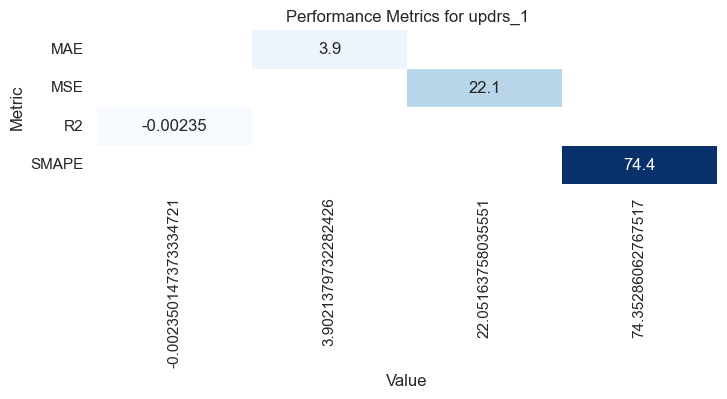

In [48]:
# Create a list of metric names and values.
metric_names = ['MSE', 'MAE', 'R2', 'SMAPE']
metric_values = [mse_updrs1, mae_updrs1, r2_updrs1, smape(y_test_updrs1, y_pred_updrs1)]

# Create a dataframe to hold the metric names and values.
df_metrics = pd.DataFrame({'Metric': metric_names, 'Value': metric_values})

# Create a heatmap to visualize the metrics.
sns.set_theme(style = "whitegrid")
fig, ax = plt.subplots(figsize = (8, 2))
sns.heatmap(df_metrics.pivot("Metric", "Value", "Value"), annot = True, fmt = ".3g", cmap = 'Blues', cbar = False)
plt.yticks(rotation = 0)
plt.title('Performance Metrics for updrs_1')
plt.show()

In [49]:
from sklearn.model_selection import cross_val_score

# Separate the dataset for updrs_1.
df_updrs1 = df[['updrs_1'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs1 = df_updrs1.iloc[:, 1:]
y_updrs1 = df_updrs1.iloc[:, 0]

# Select the top 10 features with the highest F-values.
selector1 = SelectKBest(f_regression, k = 10)
X_new1 = selector1.fit_transform(X_updrs1, y_updrs1)

# Add visit_month column to X_new.
X_new1 = np.column_stack((df_updrs1.iloc[:, 1].values, X_new1))

In [50]:
# Standardize the independent variables.
scaler1 = StandardScaler()
X_new1 = scaler1.fit_transform(X_new1)

# Fit a linear regression model using cross-validation.
model_updrs1_cv = LinearRegression()
scores = cross_val_score(model_updrs1_cv, X_new1, y_updrs1, cv = 5)
r2_updrs1_cv = scores.mean()

# Print the mean squared error.
print("r2_updrs1_cv:", r2_updrs1_cv)

r2_updrs1_cv: -0.005362151751512468


In [51]:
# Separate the dataset for updrs_2.
df_updrs2 = df[['updrs_2'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs2 = df_updrs2.iloc[:, 1:]
y_updrs2 = df_updrs2.iloc[:, 0]

# Select the top 10 features based on the F-test score.
selector2 = SelectKBest(score_func = f_regression, k = 10)

# Fit the selector on the independent variables and target variable.
X_new2 = selector2.fit_transform(X_updrs2, y_updrs2)

# Get the indices of the selected features.
selected_indices2 = selector2.get_support(indices = True)

# Get the names of the selected features.
selected_X_updrs2 = X_updrs2.columns[selected_indices2]

In [52]:
# The selected features does not include visit_month.
selected_X_updrs2

Index(['ALEYIENLR', 'AYQGVAAPFPK', 'EAEEETTNDNGVLVLEPARK',
       'FIYGGC(UniMod_4)GGNR', 'GATLALTQVTPQDER', 'LDEVKEQVAEVR', 'LEEQAQQIR',
       'LQAEAFQAR', 'QQETAAAETETR', 'TLKIENVSYQDKGNYR'],
      dtype='object')

In [53]:
# Separate the dataset for updrs_2.
df_updrs2 = df[['updrs_2'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs2 = df_updrs2.iloc[:, 1:]
y_updrs2 = df_updrs2.iloc[:, 0]

# Select the top 10 features with the highest F-values.
selector2 = SelectKBest(f_regression, k = 10)
X_new2 = selector2.fit_transform(X_updrs2, y_updrs2)

# Add visit_month column to X_new.
X_new2 = np.column_stack((df_updrs2.iloc[:, 1].values, X_new2))

# Split the dataset into training and testing sets.
X_train_updrs2, X_test_updrs2, y_train_updrs2, y_test_updrs2 = train_test_split(X_new2, y_updrs2, test_size = 0.2, random_state = 42)

In [54]:
# Standardize the independent variables.
scaler2 = StandardScaler()
X_train_updrs2 = scaler2.fit_transform(X_train_updrs2)
X_test_updrs2 = scaler2.transform(X_test_updrs2)

# Fit a linear regression model on the training set.
model_updrs2 = LinearRegression()
model_updrs2.fit(X_train_updrs2, y_train_updrs2)

# Predict the values of the dependent variable (target) on the testing set.
y_pred_updrs2 = model_updrs2.predict(X_test_updrs2)
y_pred_updrs2 = np.where(y_pred_updrs2 < 0, 0, y_pred_updrs2)

In [55]:
# Evaluate the performance of the model.
mse_updrs2 = mean_squared_error(y_test_updrs2, y_pred_updrs2)
mae_updrs2 = mean_absolute_error(y_test_updrs2, y_pred_updrs2)
r2_updrs2 = r2_score(y_test_updrs2, y_pred_updrs2)

# mean squared error, mean absolute error, r2 score, and SMAPE for updrs_2
print("mse_updrs2:", mse_updrs2)
print("mae_updrs2:", mae_updrs2)
print("r2_updrs2:", r2_updrs2)
print("SMAPE_updrs2:", smape(y_test_updrs2, y_pred_updrs2))

mse_updrs2: 34.77630555724139
mae_updrs2: 4.7469689955003425
r2_updrs2: 0.023083795042578403
SMAPE_updrs2: 102.00374526264524


In [58]:
# Separate the dataset for updrs_2.
df_updrs2 = df[['updrs_2'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs2 = df_updrs2.iloc[:, 1:]
y_updrs2 = df_updrs2.iloc[:, 0]

# Select the top 10 features with the highest F-values.
selector2 = SelectKBest(f_regression, k = 10)
X_new2 = selector2.fit_transform(X_updrs2, y_updrs2)

# Add visit_month column to X_new.
X_new2 = np.column_stack((df_updrs2.iloc[:, 1].values, X_new2))

# Standardize the independent variables.
scaler2 = StandardScaler()
X_new2 = scaler2.fit_transform(X_new2)

# Fit a linear regression model using cross-validation.
model_updrs2_cv = LinearRegression()
scores = cross_val_score(model_updrs2_cv, X_new2, y_updrs2, cv = 5)
r2_updrs2_cv = scores.mean()

# Print the mean squared error.
print("r2_updrs2_cv:", r2_updrs2_cv)


r2_updrs2_cv: 0.004342640360912897


In [60]:
# Separate the dataset for updrs_3.
df_updrs3 = df[['updrs_3'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs3 = df_updrs3.iloc[:, 1:]
y_updrs3 = df_updrs3.iloc[:, 0]

# Select the top 10 features based on the F-test score.
selector3 = SelectKBest(score_func = f_regression, k = 10)

# Fit the selector on the independent variables and target variable.
X_new3 = selector3.fit_transform(X_updrs3, y_updrs3)

# Get the indices of the selected features.
selected_indices3 = selector3.get_support(indices = True)

# Get the names of the selected features.
selected_X_updrs3 = X_updrs3.columns[selected_indices3]

In [61]:
# Separate the dataset for updrs_3.
df_updrs3 = df[['updrs_3'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs3 = df_updrs3.iloc[:, 1:]
y_updrs3 = df_updrs3.iloc[:, 0]

# Select the top 10 features with the highest F-values.
selector3 = SelectKBest(f_regression, k = 10)
X_new3 = selector3.fit_transform(X_updrs3, y_updrs3)

# Add visit_month column to X_new.
X_new3 = np.column_stack((df_updrs3.iloc[:, 1].values, X_new3))

# Split the dataset into training and testing sets.
X_train_updrs3, X_test_updrs3, y_train_updrs3, y_test_updrs3 = train_test_split(X_new3, y_updrs3, test_size = 0.2, random_state = 42)

# Standardize the independent variables.
scaler3 = StandardScaler()
X_train_updrs3 = scaler3.fit_transform(X_train_updrs3)
X_test_updrs3 = scaler3.transform(X_test_updrs3)

# Fit a linear regression model on the training set.
model_updrs3 = LinearRegression()
model_updrs3.fit(X_train_updrs3, y_train_updrs3)

# Predict the values of the dependent variable (target) on the testing set.
y_pred_updrs3 = model_updrs3.predict(X_test_updrs3)
y_pred_updrs3 = np.where(y_pred_updrs3 < 0, 0, y_pred_updrs3)

# Evaluate the performance of the model.
mse_updrs3 = mean_squared_error(y_test_updrs3, y_pred_updrs3)
mae_updrs3 = mean_absolute_error(y_test_updrs3, y_pred_updrs3)
r2_updrs3 = r2_score(y_test_updrs3, y_pred_updrs3)

# mean squared error, mean absolute error, r2 score, and SMAPE for updrs_3
print("mse_updrs3:", mse_updrs3)
print("mae_updrs3:", mae_updrs3)
print("r2_updrs3:", r2_updrs3)
print("SMAPE_updrs3:", smape(y_test_updrs3, y_pred_updrs3))

mse_updrs3: 237.3798714999584
mae_updrs3: 12.83895635550855
r2_updrs3: 0.04460050457442144
SMAPE_updrs3: 96.6187641042554


In [62]:
# Separate the dataset for updrs_3.
df_updrs3 = df[['updrs_3'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs3 = df_updrs3.iloc[:, 1:]
y_updrs3 = df_updrs3.iloc[:, 0]

# Select the top 10 features with the highest F-values.
selector3 = SelectKBest(f_regression, k = 10)
X_new3 = selector3.fit_transform(X_updrs3, y_updrs3)

# Add visit_month column to X_new.
X_new3 = np.column_stack((df_updrs3.iloc[:, 1].values, X_new3))

# Standardize the independent variables.
scaler3 = StandardScaler()
X_new3 = scaler3.fit_transform(X_new3)

# Fit a linear regression model using cross-validation.
model_updrs3_cv = LinearRegression()
scores = cross_val_score(model_updrs3_cv, X_new3, y_updrs3, cv = 5)
r2_updrs3_cv = scores.mean()

# Print the mean squared error.
print("r2_updrs3_cv:", r2_updrs3_cv)

r2_updrs3_cv: 0.03717630095177251


In [63]:
# Separate the dataset for updrs_4.
df_updrs4 = df[['updrs_4'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs4 = df_updrs4.iloc[:, 1:]
y_updrs4 = df_updrs4.iloc[:, 0]

# Select the top 10 features based on the F-test score.
selector4 = SelectKBest(score_func = f_regression, k = 10)

# Fit the selector on the independent variables and target variable.
X_new4 = selector4.fit_transform(X_updrs4, y_updrs4)

# Get the indices of the selected features.
selected_indices4 = selector4.get_support(indices = True)
# Get the names of the selected features.
selected_X_updrs4 = X_updrs4.columns[selected_indices4]
selected_X_updrs4

Index(['APLIPMEHC(UniMod_4)TTR', 'C(UniMod_4)AEENC(UniMod_4)FIQK',
       'C(UniMod_4)PFPSRPDNGFVNYPAKPTLYYK', 'DYFMPC(UniMod_4)PGR',
       'EDC(UniMod_4)NELPPRR', 'FSGSLLGGK', 'LDEVKEQVAEVR', 'LLELTGPK',
       'SILENLR', 'VLEPTLK'],
      dtype='object')

In [64]:
# Separate the dataset for updrs_4.
df_updrs4 = df[['updrs_4'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs4 = df_updrs4.iloc[:, 1:]
y_updrs4 = df_updrs4.iloc[:, 0]

# Select the top 10 features with the highest F-values.
selector4 = SelectKBest(f_regression, k = 10)
X_new4 = selector4.fit_transform(X_updrs4, y_updrs4)

# Add visit_month column to X_new.
X_new4 = np.column_stack((df_updrs4.iloc[:, 1].values, X_new4))

# Split the dataset into training and testing sets.
X_train_updrs4, X_test_updrs4, y_train_updrs4, y_test_updrs4 = train_test_split(X_new4, y_updrs4, test_size = 0.2, random_state = 42)

# Standardize the independent variables.
scaler4 = StandardScaler()
X_train_updrs4 = scaler4.fit_transform(X_train_updrs4)
X_test_updrs4 = scaler4.transform(X_test_updrs4)

# Fit a linear regression model on the training set.
model_updrs4 = LinearRegression()
model_updrs4.fit(X_train_updrs4, y_train_updrs4)

# Predict the values of the dependent variable (target) on the testing set.
y_pred_updrs4 = model_updrs4.predict(X_test_updrs4)
y_pred_updrs4 = np.where(y_pred_updrs4 < 0, 0, y_pred_updrs4)

# Evaluate the performance of the model.
mse_updrs4 = mean_squared_error(y_test_updrs4, y_pred_updrs4)
mae_updrs4 = mean_absolute_error(y_test_updrs4, y_pred_updrs4)
r2_updrs4 = r2_score(y_test_updrs4, y_pred_updrs4)

# mean squared error, mean absolute error, r2 score, and SMAPE for updrs_4
print("mse_updrs4:", mse_updrs4)
print("mae_updrs4:", mae_updrs4)
print("r2_updrs4:", r2_updrs4)
print("SMAPE_updrs4:", smape(y_test_updrs4, y_pred_updrs4))

mse_updrs4: 7.599136697285731
mae_updrs4: 2.134560687492701
r2_updrs4: -0.02927993536071627
SMAPE_updrs4: 148.9579158475508


In [65]:
# Separate the dataset for updrs_4.
df_updrs4 = df[['updrs_4'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs4 = df_updrs4.iloc[:, 1:]
y_updrs4 = df_updrs4.iloc[:, 0]

# Select the top 10 features with the highest F-values.
selector4 = SelectKBest(f_regression, k = 10)
X_new4 = selector4.fit_transform(X_updrs4, y_updrs4)

# Add visit_month column to X_new.
X_new4 = np.column_stack((df_updrs4.iloc[:, 1].values, X_new4))

# Standardize the independent variables.
scaler4 = StandardScaler()
X_new4 = scaler4.fit_transform(X_new4)

# Fit a linear regression model using cross-validation.
model_updrs4_cv = LinearRegression()
scores = cross_val_score(model_updrs4_cv, X_new4, y_updrs4, cv = 5)
r2_updrs4_cv = scores.mean()

# Print the mean squared error.
print("r2_updrs4_cv:", r2_updrs4_cv)

r2_updrs4_cv: -0.029569199136309465


In [67]:
# Add a title to the DataFrame.
print("The Results with Univariate Feature Selection")

# Create a dictionary with the metrics for each target.
metrics_dict_KBest = {
    'Target': ['UPDRS 1', 'UPDRS 2', 'UPDRS 3', 'UPDRS 4'],
    'MSE': [mse_updrs1, mse_updrs2, mse_updrs3, mse_updrs4],
    'MAE': [mae_updrs1, mae_updrs2, mae_updrs3, mae_updrs4],
    'R2': [r2_updrs1, r2_updrs2, r2_updrs3, r2_updrs4],
    'SMAPE': [smape(y_test_updrs1, y_pred_updrs1), smape(y_test_updrs2, y_pred_updrs2), 
              smape(y_test_updrs3, y_pred_updrs3), smape(y_test_updrs4, y_pred_updrs4)]
}

# Create a Pandas DataFrame from the dictionary.
metrics_df_KBest = pd.DataFrame(metrics_dict_KBest)

# Set the 'Target' column as the index.
metrics_df_KBest.set_index('Target', inplace = True)

# Display the DataFrame.
metrics_df_KBest


The Results with Univariate Feature Selection


,MSE,MAE,R2,SMAPE
Target,,,,
UPDRS 1,22.051638,3.902138,-0.002350,74.352861
UPDRS 2,34.776306,4.746969,0.023084,102.003745
UPDRS 3,237.379871,12.838956,0.044601,96.618764
UPDRS 4,7.599137,2.134561,-0.029280,148.957916


In [68]:
# Add a title to the DataFrame.
print("The Results with Univariate Feature Selection and Cross-Validation")

# Create a dictionary with the metrics for each target.
metrics_dict_KBestCV = {
    'Target': ['UPDRS 1', 'UPDRS 2', 'UPDRS 3', 'UPDRS 4'],
    'R2': [r2_updrs1_cv, r2_updrs2_cv, r2_updrs3_cv, r2_updrs4_cv],
}

# Create a Pandas DataFrame from the dictionary.
metrics_df_KBestCV = pd.DataFrame(metrics_dict_KBestCV)

# Set the 'Target' column as the index.
metrics_df_KBestCV.set_index('Target', inplace = True)

metrics_df_KBestCV

The Results with Univariate Feature Selection and Cross-Validation


,R2
Target,
UPDRS 1,-0.005362
UPDRS 2,0.004343
UPDRS 3,0.037176
UPDRS 4,-0.029569


In [70]:
# Copy sample_submission
answer = submission_df.copy()
answer

,prediction_id,rating,group_key,patient_id,updrs,visit_month
0,3342_0_updrs_1_plus_0_months,0,0,3342,1,0
1,3342_0_updrs_1_plus_6_months,0,0,3342,1,6
2,3342_0_updrs_1_plus_12_months,0,0,3342,1,12
3,3342_0_updrs_1_plus_24_months,0,0,3342,1,24
4,3342_0_updrs_2_plus_0_months,0,0,3342,2,0
...,...,...,...,...,...,...
59,50423_6_updrs_3_plus_24_months,0,6,50423,3,24
60,50423_6_updrs_4_plus_0_months,0,6,50423,4,0
61,50423_6_updrs_4_plus_6_months,0,6,50423,4,6
62,50423_6_updrs_4_plus_12_months,0,6,50423,4,12


In [72]:
for i in range(len(test_df)):
    if int(test_df['prediction_id'][i].split('_')[3]) == 1:
        
        # Get the indices of the selected features.
        selected_indices1 = selector1.get_support(indices = True)

        # Get the names of the selected features.
        selected_X_updrs1 = X_updrs1.columns[selected_indices1]
        
        # Get the indexes for the dataset for updrs_1.
        common_indexes1 = [i for i, val in enumerate(test_df.columns.values) if val in selected_X_updrs1.values]
        common_indexes1.insert(0, 5)
        
        # Separate the dataset for updrs_1.
        test_df_updrs1 = np.array(list(test_df.iloc[i, common_indexes1]))
        
        # Standardize the independent variables.
        test_df_updrs1 = test_df_updrs1.reshape(1, -1)
        scaler_test1 = StandardScaler()
        scaler_test1.fit(test_df_updrs1)
        test_df_updrs1 = scaler_test1.transform(test_df_updrs1)
        
        # Predict the values of the dependent variable (target) on the testing set.
        test_df_pred_updrs1 = model_updrs1.predict(test_df_updrs1)
        if test_df_pred_updrs1 < 0:
            test_df_pred_updrs1 = 0
        answer.loc[i, 'rating'] = np.round(test_df_pred_updrs1, 0)
        
    elif int(test_df['prediction_id'][i].split('_')[3]) == 2:
        
        # Get the indices of the selected features.
        selected_indices2 = selector2.get_support(indices = True)

        # Get the names of the selected features.
        selected_X_updrs2 = X_updrs2.columns[selected_indices2]
        
        # Get the indexes for the dataset for updrs_2.
        common_indexes2 = [i for i, val in enumerate(test_df.columns.values) if val in selected_X_updrs2.values]
        common_indexes2.insert(0, 5)
        
        # Separate the dataset for updrs_2.
        test_df_updrs2 = np.array(list(test_df.iloc[i, common_indexes2]))
        
        # Standardize the independent variables.
        test_df_updrs2 = test_df_updrs2.reshape(1, -1)
        scaler_test2 = StandardScaler()
        scaler_test2.fit(test_df_updrs2)
        test_df_updrs2 = scaler_test2.transform(test_df_updrs2)
        
        # Predict the values of the dependent variable (target) on the testing set.
        test_df_pred_updrs2 = model_updrs2.predict(test_df_updrs2)
        if test_df_pred_updrs2 < 0:
            test_df_pred_updrs2 = 0
        answer.loc[i, 'rating'] = np.round(test_df_pred_updrs2, 0)
        
    elif int(test_df['prediction_id'][i].split('_')[3]) == 3:
        
        # Get the indices of the selected features.
        selected_indices3 = selector3.get_support(indices = True)

        # Get the names of the selected features.
        selected_X_updrs3 = X_updrs3.columns[selected_indices3]
        
        # Get the indexes for the dataset for updrs_3.
        common_indexes3 = [i for i, val in enumerate(test_df.columns.values) if val in selected_X_updrs3.values]
        common_indexes3.insert(0, 5)
        
        # Separate the dataset for updrs_3.
        test_df_updrs3 = np.array(list(test_df.iloc[i, common_indexes3]))
        
        # Standardize the independent variables.
        test_df_updrs3 = test_df_updrs3.reshape(1, -1)
        scaler_test3 = StandardScaler()
        scaler_test3.fit(test_df_updrs3)
        test_df_updrs3 = scaler_test3.transform(test_df_updrs3)
        
        # Predict the values of the dependent variable (target) on the testing set.
        test_df_pred_updrs3 = model_updrs3.predict(test_df_updrs3)
        if test_df_pred_updrs3 < 0:
            test_df_pred_updrs3 = 0
        answer.loc[i, 'rating'] = np.round(test_df_pred_updrs3, 0)
        
    else:
        
        # Get the indices of the selected features.
        selected_indices4 = selector4.get_support(indices = True)

        # Get the names of the selected features.
        selected_X_updrs4 = X_updrs4.columns[selected_indices4]
        
        # Get the indexes for the dataset for updrs_4.
        common_indexes4 = [i for i, val in enumerate(test_df.columns.values) if val in selected_X_updrs4.values]
        common_indexes4.insert(0, 5)
        
        # Separate the dataset for updrs_4.
        test_df_updrs4 = np.array(list(test_df.iloc[i, common_indexes4]))
        
        # Standardize the independent variables.
        test_df_updrs4 = test_df_updrs4.reshape(1, -1)
        scaler_test4 = StandardScaler()
        scaler_test4.fit(test_df_updrs4)
        test_df_updrs4 = scaler_test4.transform(test_df_updrs4)
        
        # Predict the values of the dependent variable (target) on the testing set.
        test_df_pred_updrs4 = model_updrs4.predict(test_df_updrs4)
        if test_df_pred_updrs4 < 0:
            test_df_pred_updrs4 = 0
        answer.loc[i, 'rating'] = np.round(test_df_pred_updrs4, 0)
    
answer

,prediction_id,rating,group_key,patient_id,updrs,visit_month
0,3342_0_updrs_1_plus_0_months,7,0,3342,1,0
1,3342_0_updrs_1_plus_6_months,7,0,3342,1,6
2,3342_0_updrs_1_plus_12_months,7,0,3342,1,12
3,3342_0_updrs_1_plus_24_months,7,0,3342,1,24
4,3342_0_updrs_2_plus_0_months,6,0,3342,2,0
...,...,...,...,...,...,...
59,50423_6_updrs_3_plus_24_months,18,6,50423,3,24
60,50423_6_updrs_4_plus_0_months,2,6,50423,4,0
61,50423_6_updrs_4_plus_6_months,2,6,50423,4,6
62,50423_6_updrs_4_plus_12_months,2,6,50423,4,12


In [73]:
answer = answer.iloc[:, :2]
answer

,prediction_id,rating
0,3342_0_updrs_1_plus_0_months,7
1,3342_0_updrs_1_plus_6_months,7
2,3342_0_updrs_1_plus_12_months,7
3,3342_0_updrs_1_plus_24_months,7
4,3342_0_updrs_2_plus_0_months,6
...,...,...
59,50423_6_updrs_3_plus_24_months,18
60,50423_6_updrs_4_plus_0_months,2
61,50423_6_updrs_4_plus_6_months,2
62,50423_6_updrs_4_plus_12_months,2


In [75]:
def get_predictions(test, test_peptides, test_proteins, sample_submission):
    
    # Merge the proteins data and peptides data on the common columns.
    merged_proteins_peptides = pd.merge(proteins, peptides, on = ['visit_id', 'visit_month', 'patient_id', 'UniProt'])

    # Merge the merged protein-peptides data with the clinical data on the common columns.
    merged = pd.merge(merged_proteins_peptides, clinical, on = ['visit_id', 'visit_month', 'patient_id'])

    merged['Peptide / Protein'] = merged['PeptideAbundance'] / merged['NPX']
    merged

    # Pivot the data
    pivoted = merged.pivot(index = 'visit_id', columns = ['Peptide'], values = 'PeptideAbundance')

    # Add visit_month, the 4 scores, and medication status.
    df = pd.merge(clinical, pivoted, on = 'visit_id', how = 'right').set_index('visit_id')

    # Insert the visit_month column to the desired position.
    df.insert(6, 'visit_month', df.pop('visit_month'))

    df = df.drop('patient_id', axis = 1)

    # Replace NaN with 0 in the Peptides columns.
    df.loc[:, 'AADDTWEPFASGK':] = df.loc[:, 'AADDTWEPFASGK':].fillna(0)
        
    # Merge the proteins data and peptides data on the common columns.
    test_merged_proteins_peptides = pd.merge(test_proteins, test_peptides, on = ['visit_id', 'visit_month', 'patient_id', 'UniProt'])

    # Merge the merged protein-peptides data with the clinical data on the common columns.
    test_merged = pd.merge(test_merged_proteins_peptides, test, on = ['visit_id', 'visit_month', 'patient_id'])

    test_merged['prediction_id'] = test_merged.apply(lambda x: '{}_plus_{}months'.format(x['row_id'], x['visit_month']), axis = 1)

    test_merged['Peptide / Protein'] = test_merged['PeptideAbundance'] / test_merged['NPX']

    # Pivot the data
    test_pivoted = test_merged.pivot(index = 'prediction_id', columns = ['Peptide'], values = 'PeptideAbundance')

    # Replace NaN with 0 in the Peptides columns.
    test_pivoted.loc[:, 'AADDTWEPFASGK':] = test_pivoted.loc[:, 'AADDTWEPFASGK':].fillna(0)

    # We need to remove duplicates by patient_id.
    index_list = list(test_pivoted.index)
    patient_id = []
    for i in range(len(test_pivoted)):
        element = index_list[i].split('_')[0]
        patient_id.append(element)

    test_pivoted['patient_id'] = patient_id

    test_pivoted = test_pivoted.drop_duplicates(subset = 'patient_id')
    patient_id = test_pivoted.pop('patient_id')
    test_pivoted.insert(0, 'patient_id', patient_id)

    # We need to crate visit_month in sample submission.
    index_list = list(sample_submission.prediction_id)
    patient_id = []
    for i in range(len(sample_submission)):
        element = index_list[i].split('_')[0]
        patient_id.append(element)

    sample_submission['patient_id'] = patient_id

    # We need to crate updrs in sample submission.
    index_list = list(sample_submission.prediction_id)
    updrs = []
    for i in range(len(sample_submission)):
        element = index_list[i].split('_')[3]
        updrs.append(element)

    sample_submission['updrs'] = updrs

    # We need to crate patient_id in sample submission.
    index_list = list(sample_submission.prediction_id)
    visit_month = []
    for i in range(len(sample_submission)):
        element = index_list[i].split('_')[-2]
        visit_month.append(element)

    sample_submission['visit_month'] = visit_month

    # Merge the data and sample_submission, while keeping the order of rows of sample_submission.
    test_df = pd.merge(sample_submission, test_pivoted, on = ['patient_id'], how = 'left')

    # Drop upd23b_clinical_state_on_medication column from the previous merged train dataset df.
    df = df.drop('upd23b_clinical_state_on_medication', axis = 1)

    # If a peptide in the train dataset does not exist in the test dataset, remove it.
    remove_train = []
    for i in range(len(list(df.columns[5:].values))):
        if list(df.columns[5:].values)[i] not in list(test_df.columns[6:].values):
            remove_train.append(list(df.columns[5:].values)[i])

    df = df.drop(remove_train, axis = 1)
    
    # If a peptide in the test dataset does not exist in the train dataset, remove it.
    remove_test = []
    for i in range(len(list(test_df.columns[6:].values))):
        if list(test_df.columns[6:].values)[i] not in list(df.columns[5:].values):
            remove_test.append(list(test_df.columns[6:].values)[i])

    test_df = test_df.drop(remove_test, axis = 1)
    
    # Separate the dataset for updrs_1.
    df_updrs1 = df[['updrs_1'] + list(df.columns[4:])].dropna()

    # Separate the independent variables (predictors) and the dependent variable (target).
    X_updrs1 = df_updrs1.iloc[:, 1:]
    y_updrs1 = df_updrs1.iloc[:, 0]

    # Select the top 10 features with the highest F-values.
    selector1 = SelectKBest(f_regression, k = 10)
    X_new1 = selector1.fit_transform(X_updrs1, y_updrs1)

    # Add visit_month column to X_new.
    X_new1 = np.column_stack((df_updrs1.iloc[:, 1].values, X_new1))

    # Standardize the independent variables.
    scaler1 = StandardScaler()
    X_updrs1 = scaler1.fit_transform(X_new1)

    # Fit a linear regression model on the training set.
    model_updrs1 = LinearRegression()
    model_updrs1.fit(X_updrs1, y_updrs1)

    # Separate the dataset for updrs_2.
    df_updrs2 = df[['updrs_2'] + list(df.columns[4:])].dropna()

    # Separate the independent variables (predictors) and the dependent variable (target).
    X_updrs2 = df_updrs2.iloc[:, 1:]
    y_updrs2 = df_updrs2.iloc[:, 0]
    
    # Select the top 10 features with the highest F-values.
    selector2 = SelectKBest(f_regression, k = 10)
    X_new2 = selector2.fit_transform(X_updrs2, y_updrs2)

    # Add visit_month column to X_new.
    X_new2 = np.column_stack((df_updrs2.iloc[:, 1].values, X_new2))

    # Standardize the independent variables.
    scaler2 = StandardScaler()
    X_updrs2 = scaler2.fit_transform(X_new2)

    # Fit a linear regression model on the training set.
    model_updrs2 = LinearRegression()
    model_updrs2.fit(X_updrs2, y_updrs2)

    # Separate the dataset for updrs_3.
    df_updrs3 = df[['updrs_3'] + list(df.columns[4:])].dropna()

    # Separate the independent variables (predictors) and the dependent variable (target).
    X_updrs3 = df_updrs3.iloc[:, 1:]
    y_updrs3 = df_updrs3.iloc[:, 0]
    
    # Select the top 10 features with the highest F-values.
    selector3 = SelectKBest(f_regression, k = 10)
    X_new3 = selector3.fit_transform(X_updrs3, y_updrs3)

    # Add visit_month column to X_new.
    X_new3 = np.column_stack((df_updrs3.iloc[:, 1].values, X_new3))

    # Standardize the independent variables.
    scaler3 = StandardScaler()
    X_updrs3 = scaler3.fit_transform(X_new3)

    # Fit a linear regression model on the training set.
    model_updrs3 = LinearRegression()
    model_updrs3.fit(X_updrs3, y_updrs3)

    # Separate the dataset for updrs_4.
    df_updrs4 = df[['updrs_4'] + list(df.columns[4:])].dropna()

    # Separate the independent variables (predictors) and the dependent variable (target).
    X_updrs4 = df_updrs4.iloc[:, 1:]
    y_updrs4 = df_updrs4.iloc[:, 0]
    
    # Select the top 10 features with the highest F-values.
    selector4 = SelectKBest(f_regression, k = 10)
    X_new4 = selector4.fit_transform(X_updrs4, y_updrs4)

    # Add visit_month column to X_new.
    X_new4 = np.column_stack((df_updrs4.iloc[:, 1].values, X_new4))

    # Standardize the independent variables.
    scaler4 = StandardScaler()
    X_updrs4 = scaler4.fit_transform(X_new4)

    # Fit a linear regression model on the training set.
    model_updrs4 = LinearRegression()
    model_updrs4.fit(X_updrs4, y_updrs4)
    
    # Copy sample_submission
    answer = sample_submission.copy()
    answer

    for i in range(len(test_df)):
        
        if int(test_df['prediction_id'][i].split('_')[3]) == 1:

            # Get the indices of the selected features.
            selected_indices1 = selector1.get_support(indices = True)

            # Get the names of the selected features.
            selected_X_updrs1 = df.columns[4:][selected_indices1]

            # Get the indexes for the dataset for updrs_1.
            common_indexes1 = [i for i, val in enumerate(test_df.columns.values) if val in selected_X_updrs1.values]
            common_indexes1.insert(0, 5)

            # Separate the dataset for updrs_1.
            test_df_updrs1 = np.array(list(test_df.iloc[i, common_indexes1]))
            
            # Replace NaN values with 0.
            test_df_updrs1[np.isnan(test_df_updrs1)] = 0

            # Standardize the independent variables.
            test_df_updrs1 = test_df_updrs1.reshape(1, -1)
            scaler_test1 = StandardScaler()
            test_df_updrs1 = scaler_test1.fit_transform(test_df_updrs1)

            # Predict the values of the dependent variable (target) on the testing set.
            test_df_pred_updrs1 = model_updrs1.predict(test_df_updrs1)
            if test_df_pred_updrs1 < 0:
                test_df_pred_updrs1 = 0
            answer.loc[i, 'rating'] = np.round(test_df_pred_updrs1, 0)

        elif int(test_df['prediction_id'][i].split('_')[3]) == 2:

            # Get the indices of the selected features.
            selected_indices2 = selector2.get_support(indices = True)

            # Get the names of the selected features.
            selected_X_updrs2 = df.columns[4:][selected_indices2]

            # Get the indexes for the dataset for updrs_2.
            common_indexes2 = [i for i, val in enumerate(test_df.columns.values) if val in selected_X_updrs2.values]
            common_indexes2.insert(0, 5)

            # Separate the dataset for updrs_2.
            test_df_updrs2 = np.array(list(test_df.iloc[i, common_indexes2]))
            
            # Replace NaN values with 0.
            test_df_updrs2[np.isnan(test_df_updrs2)] = 0

            # Standardize the independent variables.
            test_df_updrs2 = test_df_updrs2.reshape(1, -1)
            scaler_test2 = StandardScaler()
            test_df_updrs2 = scaler_test2.fit_transform(test_df_updrs2)

            # Predict the values of the dependent variable (target) on the testing set.
            test_df_pred_updrs2 = model_updrs2.predict(test_df_updrs2)
            if test_df_pred_updrs2 < 0:
                test_df_pred_updrs2 = 0
            answer.loc[i, 'rating'] = np.round(test_df_pred_updrs2, 0)

        elif int(test_df['prediction_id'][i].split('_')[3]) == 3:

            # Get the indices of the selected features.
            selected_indices3 = selector3.get_support(indices = True)

            # Get the names of the selected features.
            selected_X_updrs3 = df.columns[4:][selected_indices3]

            # Get the indexes for the dataset for updrs_3.
            common_indexes3 = [i for i, val in enumerate(test_df.columns.values) if val in selected_X_updrs3.values]
            common_indexes3.insert(0, 5)

            # Separate the dataset for updrs_3.
            test_df_updrs3 = np.array(list(test_df.iloc[i, common_indexes3]))
            
            # Replace NaN values with 0.
            test_df_updrs3[np.isnan(test_df_updrs3)] = 0

            # Standardize the independent variables.
            test_df_updrs3 = test_df_updrs3.reshape(1, -1)
            scaler_test3 = StandardScaler()
            test_df_updrs3 = scaler_test3.fit_transform(test_df_updrs3)

            # Predict the values of the dependent variable (target) on the testing set.
            test_df_pred_updrs3 = model_updrs3.predict(test_df_updrs3)
            if test_df_pred_updrs3 < 0:
                test_df_pred_updrs3 = 0
            answer.loc[i, 'rating'] = np.round(test_df_pred_updrs3, 0)

        else:

            # Get the indices of the selected features.
            selected_indices4 = selector4.get_support(indices = True)

            # Get the names of the selected features.
            selected_X_updrs4 = df.columns[4:][selected_indices4]

            # Get the indexes for the dataset for updrs_4.
            common_indexes4 = [i for i, val in enumerate(test_df.columns.values) if val in selected_X_updrs4.values]
            common_indexes4.insert(0, 5)

            # Separate the dataset for updrs_4.
            test_df_updrs4 = np.array(list(test_df.iloc[i, common_indexes4]))
            
            # Replace NaN values with 0.
            test_df_updrs4[np.isnan(test_df_updrs4)] = 0

            # Standardize the independent variables.
            test_df_updrs4 = test_df_updrs4.reshape(1, -1)
            scaler_test4 = StandardScaler()
            test_df_updrs4 = scaler_test4.fit_transform(test_df_updrs4)
            
            # Predict the values of the dependent variable (target) on the testing set.
            test_df_pred_updrs4 = model_updrs4.predict(test_df_updrs4)
            if test_df_pred_updrs4 < 0:
                test_df_pred_updrs4 = 0
            answer.loc[i, 'rating'] = np.round(test_df_pred_updrs4, 0)
            answer.loc[i, 'rating'] = 0

    answer = answer.iloc[:, :2]

    return answer

In [89]:
import sys
sys.path.append('/kaggle/input/amp-pd')
import amp_pd_peptide

ModuleNotFoundError: No module named 'amp_pd_peptide.competition'

In [90]:
# Initialize the environment.
env = amp_pd_peptide.make_env()
iter_test = env.iter_test()

NameError: name 'amp_pd_peptide' is not defined

In [91]:
# Register the predictions.
for (test, test_peptides, test_proteins, sample_submission) in iter_test:

    result = get_predictions(test, test_peptides, test_proteins, sample_submission)
    
    if len(sample_submission) == len(result):
        sample_submission['rating'] = result['rating']
        
    elif len(sample_submission) < len(result):
        sample_submission['rating'] = result['rating'][0:len(sample_submission)]
        
    else:
        sample_submission['rating'][0:len(result)] = result['rating']

    sample_submission = sample_submission.iloc[:, 0:2]
    
    env.predict(sample_submission)

NameError: name 'iter_test' is not defined

In [ ]:
print(sample_submission)
